In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [2]:
# Create Stopword
f = open("Kamus/Stopword.txt", "r")
my_stop_words = f.readline().split()
f.close()

In [3]:
# Import data
data_ = pd.read_csv('Dataset/Data Sentiment Twitter 19 - 27 April.csv')
datap = data_['Tweets'][data_['Sentiment'] == 1].index
datan = data_['Tweets'][data_['Sentiment'] == -1].index

In [4]:
def my_preprocessor(mytext): pass
def my_tokenizer(mytext): pass

In [5]:
# Load Model
import pickle
vectorizer_count = pickle.load(open('Main_Model/vectorizer_count.pickle', 'rb'))
vectorizer_tfidf = pickle.load(open('Main_Model/vectorizer_tfidf.pickle', 'rb'))
word_count = pickle.load(open('Main_Model/word_count.pickle', 'rb'))
word_tfidf = pickle.load(open('Main_Model/word_tfidf.pickle', 'rb'))

In [6]:
# Fitur
nama_fitur = vectorizer_tfidf.get_feature_names()

In [7]:
# Select Positif & Negatif
positif = word_tfidf[datap]
negatif = word_tfidf[datan]

In [18]:
# Temp
top_positif = {}
top_negatif = {}
k_positif = {}
k_negatif = {}

In [19]:
# Mencari Kata positif & Kata positif Dengan Bobot tertinggi
for i in range(positif.shape[0]):
    row = positif.getrow(i).toarray()[0]
    max_ = max(row)
    for j in range(len(row)):
        if row[j] > 0:
            if nama_fitur[j] not in k_positif :
                k_positif[nama_fitur[j]] = 1
            else :
                k_positif[nama_fitur[j]] += 1
            if row[j] == max_:
                if nama_fitur[j] in top_positif :
                    top_positif[nama_fitur[j]] += 1
                else :
                    top_positif[nama_fitur[j]] = 1

In [20]:
# Mencari Kata negatif & Kata negatif Dengan Bobot tertinggi
for i in range(negatif.shape[0]):
    row = negatif.getrow(i).toarray()[0]
    max_= max(row)
    for j in range(len(row)):
        if row[j] > 0:
            if nama_fitur[j] not in k_negatif :
                k_negatif[nama_fitur[j]] = 1
            else :
                k_negatif[nama_fitur[j]] += 1
            if row[j] == max_:
                if nama_fitur[j] in top_negatif :
                    top_negatif[nama_fitur[j]] += 1
                else :
                    top_negatif[nama_fitur[j]] = 1

In [29]:
# Mengurangi duplikasi kata positif & negatif melalui perbandingan rasio kemunculan katanya
delp = []
deln = []
for kata in k_negatif.keys():
    if kata in k_positif:
        rasiop = k_positif[kata]/sum(k_positif.values())
        rasion = k_negatif[kata]/sum(k_negatif.values())
        if rasiop > rasion : delp.append(kata)
        else : deln.append(kata)
for i in delp : del k_positif[i]
for j in deln : del k_negatif[j]

In [13]:
# Sorting
top_positif = {k: v for k, v in sorted(top_positif.items(), key=lambda item: item[1],reverse=True)}
top_negatif = {k: v for k, v in sorted(top_negatif.items(), key=lambda item: item[1],reverse=True)}

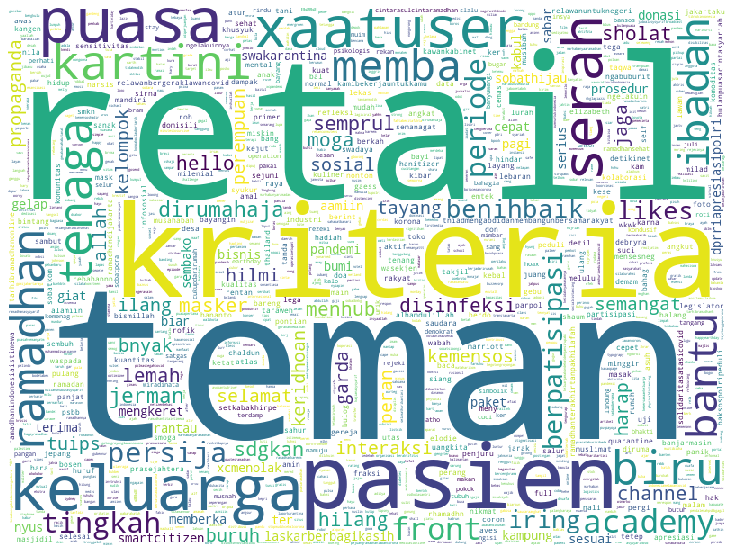

In [14]:
# WordCloud kata dengan bobot terbesar Positif
w = WordCloud(width=800,height=600,mode='RGBA',stopwords=my_stop_words,background_color='white',max_words=2000).fit_words(top_positif)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(w)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

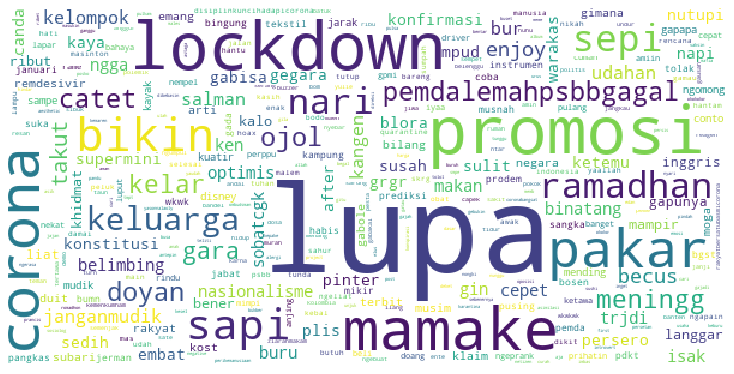

In [32]:
# WordCloud kata dengan bobot terbesar Negatif
w = WordCloud(width=600,height=300,mode='RGBA',stopwords=my_stop_words,background_color='white',max_words=2000).fit_words(top_negatif)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(w)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [33]:
# Sorting
kata_pos = sorted(k_positif.keys())
kata_neg = sorted(k_negatif.keys())

In [34]:
# Export Kata Positif & Kata Negatif
p = open('Kamus/Kata_Positif.txt','w')
for kata in kata_pos:
    p.writelines(kata+'\n')
p.close()

n = open('Kamus/Kata_Negatif.txt','w')
for kata in kata_neg:
    n.writelines(kata+'\n')
n.close()